# LEPL1106, Devoir 2 : convolution et réponse impulsionnelle

## 0) Introduction

On va s'intéresser pour ce devoir à l'opération de convolution $*$ (en temps discret), et plus particulièrement à son utilisation pour modéliser la sortie $y[n]$ d'un système $H$ dont la réponse impulsionnelle est $h[n]$. Pour une entrée $x[n]$, on a ainsi :

$$y[n] = (x * h)[n] = \sum_k x[n-k] h[k].$$

In [773]:
import numpy as np
import matplotlib.pyplot as plt

# Tailles de police et couleurs utilisées avec la librairie matplotlib
legendsize = 14
titlesize = 14
labelsize = 16
colors = {'orange':[0.894,0.424,0.039],'red':[0.753,0.0,0.0],
          'violet':[0.580,0.0,0.827],'green':[0.437,0.576,0.235],
          'lightgreen':[0.0,0.9,0.0],'darkgreen':[0.0,0.5,0.0],
          'blue':[0.0,0.439,0.753],'cyan':[0.0,0.9,1.0],
          'white':[1.0,1.0,1.0], 'black':[0.0,0.0,0.0],
          'grey':[0.5,0.5,0.5],'lightgrey':[0.7,0.7,0.7],
          'maroon':[0.5,0.0,0.0],'brown':[0.545,0.271,0.075],
          'gold':[0.812,0.710,0.231],'pink':[1.0,0.078,0.576]}

Dans [NumPy](http://www.numpy.org/), une implémentation possible$^1$ de la convolution est donnée par `np.convolve` :

$^1$*Un petit teaser pour les plus curieux d'entre vous : `np.convolve` implémente la convolution de manière "naive" en appliquant directement la définition ci-dessus. Pour deux signaux de taille égale $N$ (si `x.size = h.size = N`), cette implémentation a une complexité algorithmique de $\mathcal O(N^2)$, ce qui peut être assez lourd pour $N$ grand (ici, ce problème n'apparaitra pas car les `h` que nous considérons ont un support très court). Heureusement, grâce au **théorème de la convolution** (que vous verrez plus tard dans le cours) et à l'algorithme FFT qui calcule la **transformée de Fourier discrète**  (idem) de façon très efficace, il existe une autre implémtation. Celle-ci est disponible via `scipy.signal.fftconvolve`, du package `scipy` (SCIentific PYthon), et a une complexité $\mathcal O(N \log(N))$, ce qui est bien plus rapide pour les grandes valeurs de $N$. On reviendra là-dessus plus tard, quand nous étudierons le **filtrage** des signaux.*


In [774]:
help(np.convolve)

Help on _ArrayFunctionDispatcher in module numpy:

convolve(a, v, mode='full')
    Returns the discrete, linear convolution of two one-dimensional sequences.
    
    The convolution operator is often seen in signal processing, where it
    models the effect of a linear time-invariant system on a signal [1]_.  In
    probability theory, the sum of two independent random variables is
    distributed according to the convolution of their individual
    distributions.
    
    If `v` is longer than `a`, the arrays are swapped before computation.
    
    Parameters
    ----------
    a : (N,) array_like
        First one-dimensional input array.
    v : (M,) array_like
        Second one-dimensional input array.
    mode : {'full', 'valid', 'same'}, optional
        'full':
          By default, mode is 'full'.  This returns the convolution
          at each point of overlap, with an output shape of (N+M-1,). At
          the end-points of the convolution, the signals do not overlap
     

## 1) Convolution

Comme première tâche cette semaine, nous vous demandons d'écrire une fonction qui retourne la convolution entre deux signaux $x[n]$ et $h[n]$.

> *Trop facile, `np.convolve` et c'est plié !*
>
> --- étudiant anonyme

Oui, et nous vous encourageons à en profiter, mais : on vous demande de faire particulièrement attention aux *indices* qui correspondent au résultat de la convolution ! Plus précisément donc, on vous demande d'écrire la fonction `convolution(x,nx,h,nh)`, où:

* Le numpy array `x` contient les valeurs du signal $x[n]$ évaluées aux indices correspondant dans `nx` (un numpy array d'entiers consécutifs). **Remarque** on suppose que $x[n] = 0$ en dehors des indices fournis dans `nx`.
* Similairement, l'array `h` représente le signal $h[n]$ aux indices dans `nh`.

Par exemple, le signal "triangle" de "base" $2T-1$, donné par $h[n] = r[n + T] - 2r[n] + r[n-T]$, sera représenté ainsi :



h  :  [1 2 3 4 3 2 1]
nh :  [-3 -2 -1  0  1  2  3]


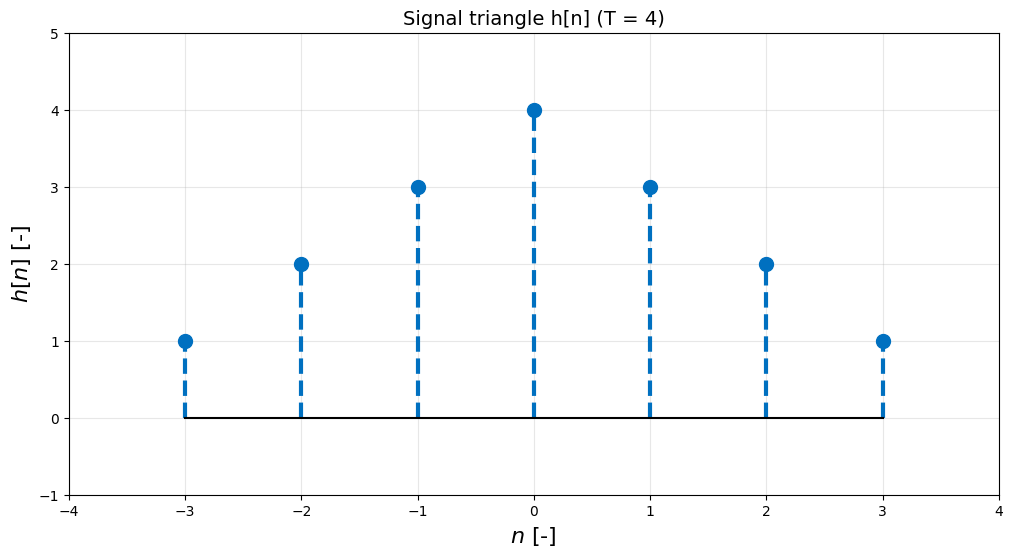

In [775]:
T = 4
h = np.append(np.arange(1,T),np.arange(T,0,-1))
nh = np.arange(-(T-1),T)

print("h  : ",h)
print("nh : ",nh)

# N.B.:
# Nous vous fournissons ici des plots que nous considérons comme corrects.
# Lorsque nous vous demandons des plots, faites bien attention à respecter les consignes spécifiques à chaque figure.
# Si vous utilisez les variables définies au début du notebook (ex : labelsize), veillez à les re-définir sur INGInious.

plt.figure(figsize=(12,6))
markerline, stemlines, baseline = plt.stem(nh,h)

plt.setp(baseline,color=colors['black'])
plt.setp(stemlines,color=colors['blue'],linewidth=3,linestyle='--')
plt.setp(markerline,color=colors['blue'],marker='o',markersize=10)

plt.title(f"Signal triangle h[n] (T = {T})",fontsize=titlesize)
plt.xlabel(r'$n$ [-]',fontsize=labelsize)
plt.ylabel(r'$h[n]$ [-]',fontsize=labelsize)
plt.grid('on',alpha=0.3)
plt.xlim((-4,4))
plt.ylim((-1,5))
plt.show()

Votre fonction `convolution` doit renvoyer deux vecteurs (numpy array), `y` et `ny`, où `y` contient les valeurs du signal $y[n]$ évalué aux indices retournés dans `ny` (attention à bien retourner un *tuple* `(y,ny)`). Le vecteur `ny` est donc un vecteur d'entiers consécutifs, qui contient toutes les valeurs de $n$ où la convolution peut être non-nulle.

In [776]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS

def convolution(x,nx,h,nh):
    """
    Calcule la convolution discrète des signaux `x` et `h`.

    Arguments
    ---------
    `x` : ndarray
        Premier signal

    `nx` : ndarray (same size as `x`)
        Indices correspondants aux valeurs de `x`

    `h` : ndarray
        Deuxième signal

    `nh` : ndarray (same size as `h`)
        Indices correspondants aux valeurs de `h`
    
    Retourne
    --------
    `y` : ndarray
        convolution entre les signaux `x` et `h`, de taille `len(x)+len(h)-1`

    `ny` : ndarray (same size as `y`)
        Indices correspondants aux valeurs de `y`
    """

    # On vérifie d'abord que les ndarrays donnés en entrée ne sont pas vides
    if len(x) == 0:
        raise ValueError('x cannot be empty')
    if len(nx) == 0:
        raise ValueError('nx cannot be empty')
    if len(h) == 0:
        raise ValueError('h cannot be empty')
    if len(nh) == 0:
        raise ValueError('nh cannot be empty')

    # On calcule ensuite les indices de départ et de fin du signal `ny`, `start` et `stop`, ainsi que sa longueur, `length`
    start = nx[0]+nh[0]
    stop = nx[-1]+nh[-1]
    length = stop-start+1

    # Convolution des deux signaux (double boucle 'for') et calcul de `ny` grâce aux valeurs précédentes
    y = np.array([sum([x[k]*h[n-k] if (k in range(len(x)) and n-k in range(len(h))) else 0 for k in range(length)]) for n in range(length)])
    ny = np.arange(start,stop+1)
    
    return (y,ny)

In [777]:
## CELLULE DE TEST (1/2)

# Créer un signal avec quelques deltas
nx = np.arange(-10,21)
x  = np.zeros(nx.size)
deltas = [-7, 2, 13, 18] # position des deltas
x[deltas - nx[0]] = 1

print("Taille de x:  ", x.size, "\tet de nx :", nx.size)
print("Taille de h:  ", h.size, "\tet de nh :", nh.size)

(y,ny) = convolution(x,nx,h,nh)

print("Taille de y:  ", y.size, "\tet de ny :", ny.size)

#print(f'Same as np.convolve? : {y == np.convolve(x,h)}')

Taille de x:   31 	et de nx : 31
Taille de h:   7 	et de nh : 7
Taille de y:   37 	et de ny : 37


In [778]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def plot_convolution(x,nx,y,ny,fig_name):
    """
    Représente la convolution discrète entre `x` et `y` sous forme de graphique
    
    Arguments
    ---------
    `x` : ndarray
        Premier signal

    `nx` : ndarray (same size as `x`)
        Indices correspondants aux valeurs de `x`

    `y` : ndarray
        Deuxième signal

    `ny` : ndarray (same size as `y`)
        Indices correspondants aux valeurs de `y`
    
    Retourne
    --------
    Sauvegarde la représentation graphique de la convolution entre `x` et `y` dans le même dossier que ce code
    """


    def convolution(x,nx,h,nh):
        """
        Calcule la convolution discrète des signaux `x` et `h`.

        Arguments
        ---------
        `x` : ndarray
            Premier signal

        `nx` : ndarray (same size as `x`)
            Indices correspondants aux valeurs de `x`

        `h` : ndarray
            Deuxième signal

        `nh` : ndarray (same size as `h`)
            Indices correspondants aux valeurs de `h`
        
        Retourne
        --------
        `y` : ndarray
            convolution entre les signaux `x` et `h`, de taille `len(x)+len(h)-1`

        `ny` : ndarray (same size as `y`)
            Indices correspondants aux valeurs de `y`
        """

        # On vérifie d'abord que les ndarrays donnés en entrée ne sont pas vides
        if len(x) == 0:
            raise ValueError('x cannot be empty')
        if len(nx) == 0:
            raise ValueError('nx cannot be empty')
        if len(h) == 0:
            raise ValueError('h cannot be empty')
        if len(nh) == 0:
            raise ValueError('nh cannot be empty')

        # On calcule ensuite les indices de départ et de fin du signal `ny`, `start` et `stop`, ainsi que sa longueur, `length`
        start = nx[0]+nh[0]
        stop = nx[-1]+nh[-1]
        length = stop-start+1

        # Convolution des deux signaux (double boucle 'for') et calcul de `ny` grâce aux valeurs précédentes
        y = np.array([sum([x[k]*h[n-k] if (k in range(len(x)) and n-k in range(len(h))) else 0 for k in range(length)]) for n in range(length)])
        ny = np.arange(start,stop+1)
        
        return (y,ny)


    # Calcule la convolution entre x et y
    s, ns = convolution(x, nx, y, ny)

    # Création de la figure
    plt.figure(figsize=(12,6.75))

    # Gestion de la graduation des axes
    plt.xticks([n for n in ns if np.abs(n)%5==0])
    plt.yticks(range(int(max(s))+1))

    # Récupération des données et création du plot
    _, _, baseline = plt.stem(ns,s)
    
    # Nom des axes et taille de police
    fs = 16
    plt.xlabel("$n$", fontsize=fs-3)
    plt.ylabel("$x[n]$*$y[n]$", fontsize=fs-3)

    # Esthétique de la "baseline"
    baseline.set_color('k')
    baseline.set_linewidth(1)
    
    # Titre
    plt.title(f"Convolution entre $x$ et $y$", fontsize=fs)

    # Sauvegarde
    plt.savefig(fig_name + '.png', format='png', bbox_inches='tight')

    return


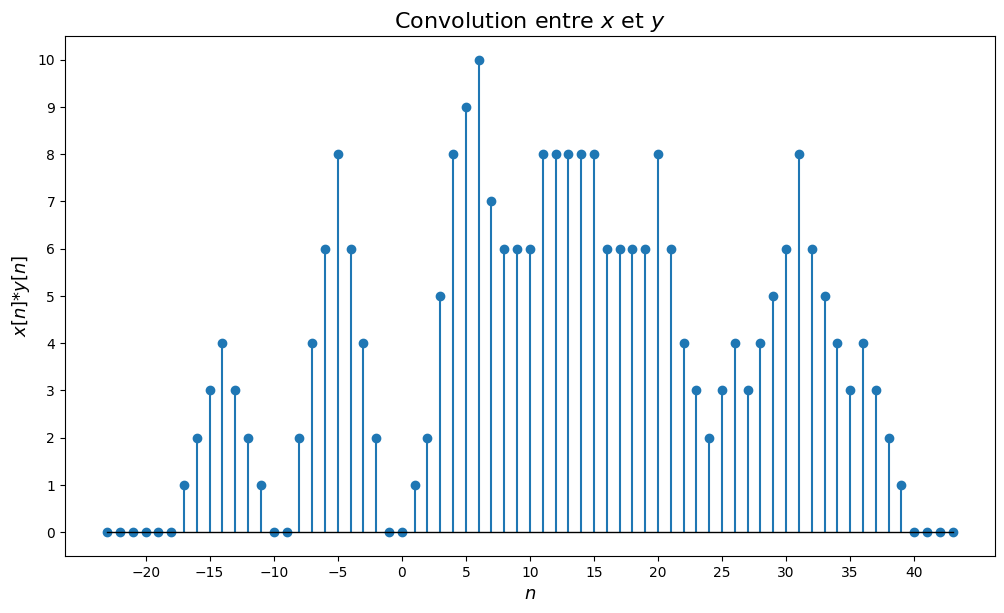

In [779]:
## CELLULE DE TEST

plot_convolution(x,nx,y,ny,'plot_convolution')

# La figure s'affichera ci-dessous :

## 2) La sortie d'un système par convolution
Considérons maintenant le tout premier *système* des devoirs de ce cours : la "moyenne glissante" (*moving average*), souvent utilisée pour "lisser" des signaux qui présentent de fortes fluctuations (comme on le verra plus tard dans le cours, c'est un "filtre passe-bas"). Plus précisément, pour une entrée $x[n]$, la sortie $y[n]$ du système "moyenne glissante" de taille $M > 0$ renvoie la moyenne des $M$ derniers échantillons, i.e.,

$$y[n] = \frac{x[n]+x[n-1]+...+x[n-(M-1)]}{M}.$$

La *réponse impulsionnelle* de ce systeme est
$$h[n] = \frac{1}{M} (u[n] - u[n - M]).$$

En effet, on peut verifier (faites-le!) à partir des deux équations précédentes que $y[n] = (x * h)[n]$, où $*$ est le *produit de convolution*.

On vous demande d'écrire `moving_average(x,M)` qui implémente ce système : pour un signal $x$ (un numpy array de taille $N$ correspondant aux valeurs $x[0], x[1], ..., x[N-1]$) et une taille de fenêtre $M$, calculez la sortie $y$ définie ci-dessus (un numpy array de taille $N$ correspondant aux valeurs $y[0], y[1], ..., y[N-1]$, **de même taille que l'entrée $x$**, évaluée aux mêmes indices).

Il vous faudra donc
1. calculer $h$ (par exemple, grâce à votre fonction `window` où $n_0 = 0$ et $n_1 = M$), évaluée aux indices $n = 0, 1, ..., L-1$ pour une taille $L \geq M$.
2. puis d'utiliser `convolution` pour calculer le produit de convolution $y = x * h$. Attention à bien respecter la contrainte vis-à-vis des valeurs qu'on souhaite conserver.

(précision : on suppose que les valeurs précédentes de $x$ sont nulles, i.e. $x[n] = 0$ pour $n < 0$)

In [780]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
# ATTENTION : SI VOUS UTILISEZ VOTRE FONCTION convolution DANS CETTE CELLULE,
#    VOUS DEVEZ REDEFINIR convolution DANS LA FONCTION moving_average POUR LA SOUMISSION INGINIOUS



def moving_average(x,M,convolute=False):
    """
    Calcule la 'moyenne glissante' de `x` telle que chaque valeur du signal de sortie `y` correspond à la moyenne des `M` précédentes valeurs de `x`.

    Arguments
    ---------
    `x` : ndarray
        signal discret quelconque
        
    `M` : int
        nombre de valeurs de `x` prises en compte pour calculer `y`. Plus M est grand, plus les valeurs de `y` sont stables
    
    `convolute` : bool=False
        Si `True`, la fonction calcule `y` comme étant la convolution entre `x` et `1/M (u[n] - u[n - M])`.
        Si `False`, la fonction calcule `y` directement à partir de `x` : `y[n] = (x[n]+x[n-1]+...+x[n-(M-1)]) / M`. 

        `False` est choisi par défaut si la valeur de `convolute` n'est pas précisée, car plus efficace en terme de mémoire et de temps d'exécution.
    
    Retourne
    --------
    `y` : ndarray
        moyenne glissante de `x`

    `ny` : ndarray (same size as `y`)
        indices correspondants aux valeurs de `y`
    """


    def convolution(x,nx,h,nh):
        """
        Calcule la convolution discrète des signaux `x` et `h`.

        Arguments
        ---------
        `x` : ndarray
            Premier signal

        `nx` : ndarray (same size as `x`)
            Indices correspondants aux valeurs de `x`

        `h` : ndarray
            Deuxième signal

        `nh` : ndarray (same size as `h`)
            Indices correspondants aux valeurs de `h`
        
        Retourne
        --------
        `y` : ndarray
            convolution entre les signaux `x` et `h`, de taille `len(x)+len(h)-1`

        `ny` : ndarray (same size as `y`)
            Indices correspondants aux valeurs de `y`
        """

        if len(x) == 0:
            raise ValueError('x cannot be empty')
        if len(nx) == 0:
            raise ValueError('nx cannot be empty')
        if len(h) == 0:
            raise ValueError('h cannot be empty')
        if len(nh) == 0:
            raise ValueError('nh cannot be empty')
        
        start = nx[0]+nh[0]
        stop = nx[-1]+nh[-1]
        length = stop-start+1

        y = np.array([sum([x[k]*h[n-k] if (k in range(len(x)) and n-k in range(len(h))) else 0 for k in range(length)]) for n in range(length)])
        ny = np.arange(start,stop+1)

        return (y,ny)
    
    def window(n,n0,n1,A):
        """
        Calcule la fenêtre rectangulaire temporelle en temps discret, définie comme
        w[n] =  `A` si `n0` <= `n` < `n1`  et  0 sinon
        pour chaque indice de `n`.
        
        Arguments
        ---------
        `n` : ndarray
            Contient les indices (entiers) auxquels on applique la fenêtre temporelle
        `A` : int
            Valeur du signal à l'intérieur de la fenêtre temporelle
        `n0`, `n1`: int
            Respectivement les bornes inférieures et supérieures de la fenêtre
        
        Retourne
        --------
        result : ndarray
            Numpy array de la même taille que n contenant les valeurs de w[n]
        """
        return np.where((n>=n0) & (n<n1), A, 0)
    
    y = np.zeros(x.shape)

    if convolute:
       y, _ = convolution(window(np.array(range(M)),0,M,1/M),np.array(range(M)),x,np.array(range(x.size)))
       y = y[:y.size-M+1]
       
    if not convolute:
        for i in range(len(y)):
            past_x = [x[i-j] for j in range(M) if i-j in range(len(x))]
            y[i] = sum(past_x)/len(past_x)

    return y

### Une application pour tester notre fonction

Les données fournies $x$ avec ce devoir décrivent la production d'énergie photovoltaïque chez Mr et Mme Dupont depuis l'installation de leurs panneaux, le 27 mai 2023 jusqu'au 20 février 2024. Cette production variant d'un jour à l'autre en fonction de la météo, nous vous proposons d'étudier le signal lissé par une moyenne glissante de taille 14, correspondant à 2 semaines.

*Attention à bien télécharger le fichier "prod_elec.npy" sur Moodle et à le placer dans le même dossier que ce notebook*

In [781]:
x = np.load("prod_elec.npy")  # Production photovoltaïque journalière depuis le 27 mai 2023 de Mr et Mme Dupont (données gentiment transmises par Mr et Mme Dupont)
N = len(x)
h = np.arange(N) # jours
y = moving_average(x,M=20) # Moyenne sur deux semaines


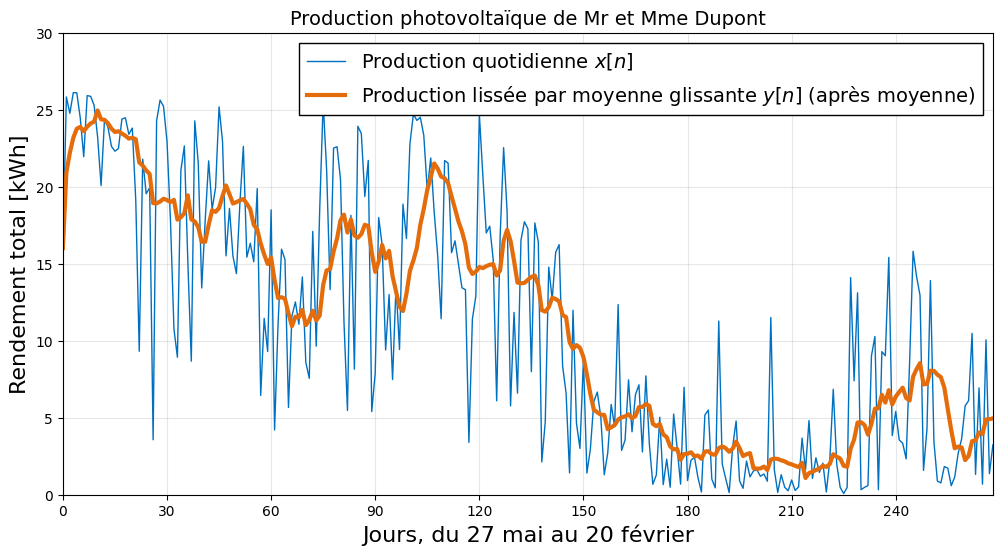

In [782]:
plt.figure(figsize=(12,6))
plt.plot(h,x,label=r"Production quotidienne $x[n]$",linewidth=1,color=colors['blue'])
plt.plot(h,y,label=r"Production lissée par moyenne glissante $y[n]$ (après moyenne)",linewidth=3,color=colors['orange'])
plt.title("Production photovoltaïque de Mr et Mme Dupont",fontsize=titlesize)
plt.xlabel("Jours, du 27 mai au 20 février",fontsize=labelsize)
plt.ylabel("Rendement total [kWh]",fontsize=labelsize)
plt.legend(fontsize=legendsize,framealpha=1,fancybox=False,edgecolor='k')
plt.grid('on',alpha=0.3)
plt.xlim((1, h[-1])); plt.ylim((0,30))
plt.xticks(h[::30])
plt.show()

In [783]:
import matplotlib
matplotlib.__version__

'3.8.2'